# BT4211 Project


## Feature Description
- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not - frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid
- CASH_ADVANCE_TRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRC_FULL_PAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

# 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, OrdinalEncoder, RobustScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,FactorAnalyzer,calculate_kmo
import pingouin as pg

In [144]:
#SKlearn & other ML Packages
import shap
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score, log_loss, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
import warnings
warnings.filterwarnings(action="ignore")

## 2. Read Data & Data Validation

In [5]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.shape

(8950, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
#Check for missing/NULL values
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
df['CUST_ID'].nunique()

8950

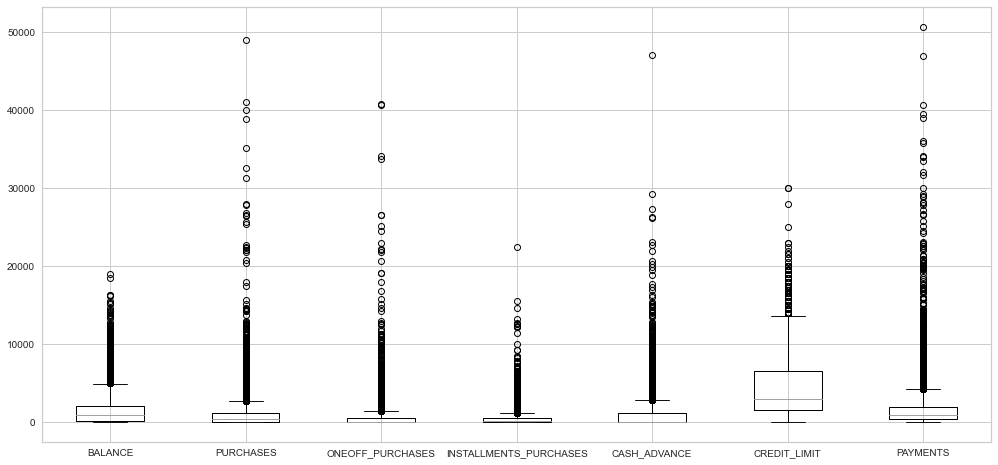

In [11]:
#Based on the boxplot, we observed that there is a significant amount of data that are outliers.
plt.figure(figsize=(17,8))
df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']].boxplot()
plt.show()

In [12]:
# Quantile Statistics
# Additionally, the quantiles/ IQR is observed to have a wide range 
quantile = df.describe().loc[["min", "25%", "50%", "75%", "max"]].transpose()
quantile.columns = ["min", "Q1", "Q2", "Q3", "max"]
quantile["range"] = quantile["max"] - quantile["min"]
quantile["IQR"] = quantile["Q3"] - quantile["Q1"]
quantile

,min,Q1,Q2,Q3,max,range,IQR
BALANCE,0.000000,128.281915,873.385231,2054.140036,19043.13856,19043.138560,1925.858120
BALANCE_FREQUENCY,0.000000,0.888889,1.000000,1.000000,1.00000,1.000000,0.111111
PURCHASES,0.000000,39.635000,361.280000,1110.130000,49039.57000,49039.570000,1070.495000
ONEOFF_PURCHASES,0.000000,0.000000,38.000000,577.405000,40761.25000,40761.250000,577.405000
INSTALLMENTS_PURCHASES,0.000000,0.000000,89.000000,468.637500,22500.00000,22500.000000,468.637500
CASH_ADVANCE,0.000000,0.000000,0.000000,1113.821139,47137.21176,47137.211760,1113.821139
PURCHASES_FREQUENCY,0.000000,0.083333,0.500000,0.916667,1.00000,1.000000,0.833334
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.000000,0.083333,0.300000,1.00000,1.000000,0.300000
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000,0.000000,0.166667,0.750000,1.00000,1.000000,0.750000
CASH_ADVANCE_FREQUENCY,0.000000,0.000000,0.000000,0.222222,1.50000,1.500000,0.222222


In [13]:
#patching null values in data set using KNNImputer to avoid bias
null_columns = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

imputer = KNNImputer()
patches = pd.DataFrame(imputer.fit_transform(df[null_columns]), columns = null_columns)
df = df.fillna(patches)

In [14]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
#Feature Engineering
#Based on the type of purchases, we can classify or categorise it according to type of purchase they made.
df['type_of_purchase'] = np.where((df['INSTALLMENTS_PURCHASES'] == 0) & (df['ONEOFF_PURCHASES'] == 0), 'Cash',
                        np.where((df['INSTALLMENTS_PURCHASES'] == 0) & (df['ONEOFF_PURCHASES'] > 0), 'One_off',
                        np.where((df['INSTALLMENTS_PURCHASES'] > 0) & (df['ONEOFF_PURCHASES'] == 0), 'Installment', 'Both')))

#Monthly Average Purchase over the period the customer has been using the card
df['avg_monthly_purchase'] = df['PURCHASES']/df['TENURE']
                                  
#Monthly Average Cash Advance over the period the customer has been using the card
df['avg_monthly_cash'] = df['CASH_ADVANCE']/df['TENURE']

#Monthly Average Payments over the period the customer has been using the card
df['avg_monthly_payments'] = df['PAYMENTS']/df['TENURE']

#Utilization rate of Credit Card
df['utilisation_ratio'] = df['BALANCE']/df['CREDIT_LIMIT']

#Payments to Minimum payments ratio
df['payments_to_min_payments'] = df['PAYMENTS']/df['MINIMUM_PAYMENTS']

#Since all CUST_ID are truly unique, we can drop the column on cust_id
df = df.drop(['CUST_ID'], axis = 1)

## 3. Exploratory Data Analysis (EDA)

In [16]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'type_of_purchase', 'avg_monthly_purchase',
       'avg_monthly_cash', 'avg_monthly_payments', 'utilisation_ratio',
       'payments_to_min_payments'],
      dtype='object')

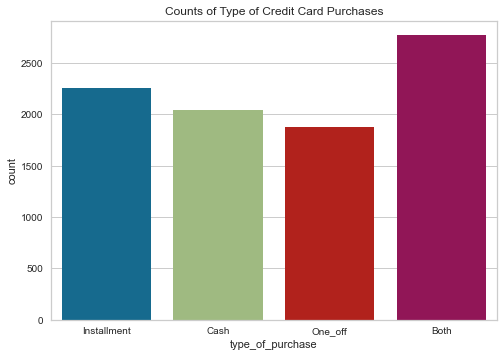

In [17]:
sns.countplot(data = df, x = 'type_of_purchase')
plt.title('Counts of Type of Credit Card Purchases')
plt.show()

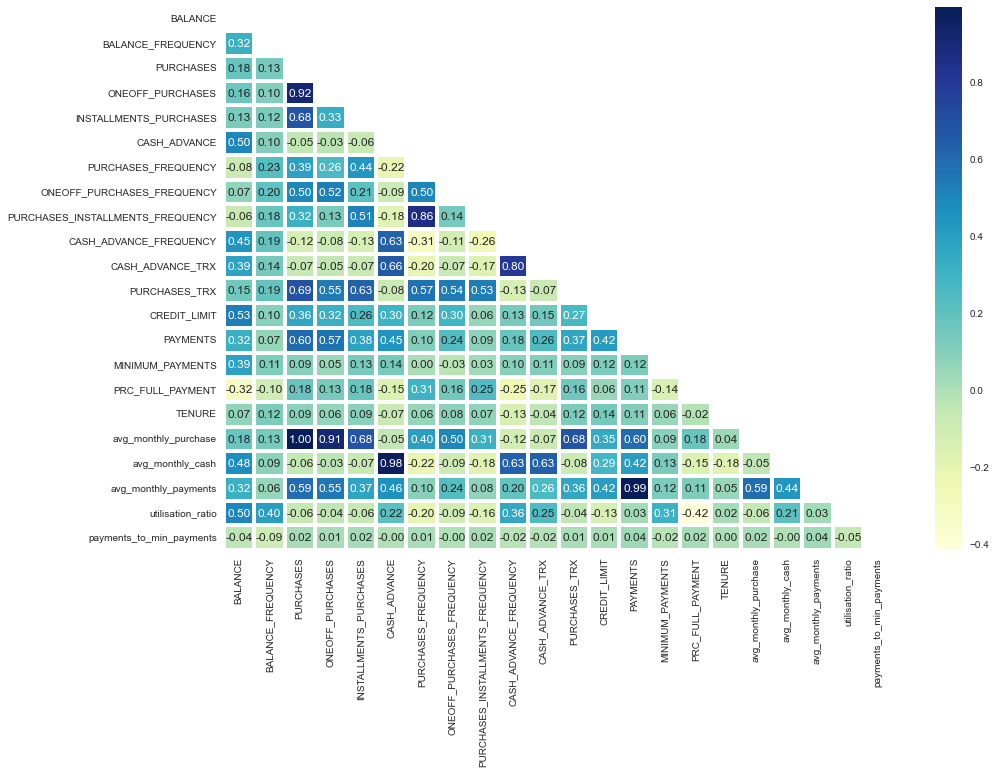

In [18]:
corr = df.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr, annot = True, cmap='YlGnBu', linewidths=3, fmt=".2f", mask = np.triu(corr))
plt.show()

In [19]:
# Creating a bar plot showing the correlation of the numeric features
c = corr.abs()
corr_bar = c.unstack().sort_values(kind='quicksort')
corr_bar = corr_bar.loc[lambda x: x < 1]
corr_bar = corr_bar.drop_duplicates()
corr_bar = corr_bar.sort_values(ascending = False)

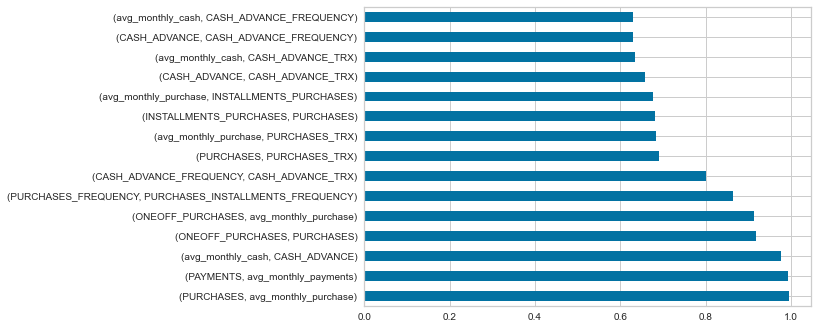

In [20]:
#top 15 correlated features.
corr_bar[:15].plot(kind = 'barh')
plt.show()

In [21]:
NUMERICAL_VARIABLES = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'avg_monthly_purchase', 'avg_monthly_cash', 'avg_monthly_payments', 
       'utilisation_ratio', 'payments_to_min_payments']
CATEGORICAL_VARIABLES = ['type_of_purchase']

In [22]:
#General Descriptive Statistics for Numerical Features
descriptive_stats = df[NUMERICAL_VARIABLES].describe().loc[["mean", "std", "50%"]].transpose()
descriptive_stats.columns = ["mean", "std", "median"]
descriptive_stats["mode"] = df.mode().transpose()[0]
descriptive_stats["mad"] = [stats.median_abs_deviation(df[x]) for x in NUMERICAL_VARIABLES]
descriptive_stats["kurtosis"] = [stats.kurtosis(df[x], fisher=False) for x in NUMERICAL_VARIABLES]
descriptive_stats["excess kurtosis"] = [stats.kurtosis(df[x], fisher=True) for x in NUMERICAL_VARIABLES]
descriptive_stats["skewness"] = [stats.skew(df[x]) for x in NUMERICAL_VARIABLES]
descriptive_stats

,mean,std,median,mode,mad,kurtosis,excess kurtosis,skewness
BALANCE,1564.474828,2081.531879,873.385231,0.0,799.865197,10.669794,7.669794,2.392985
BALANCE_FREQUENCY,0.877271,0.236904,1.000000,1.0,0.000000,6.089972,3.089972,-2.022926
PURCHASES,1003.204834,2136.634782,361.280000,0.0,361.280000,114.325882,111.325882,8.142904
ONEOFF_PURCHASES,592.437371,1659.887917,38.000000,0.0,38.000000,167.095191,164.095191,10.043399
INSTALLMENTS_PURCHASES,411.067645,904.338115,89.000000,0.0,89.000000,99.520563,96.520563,7.297897
CASH_ADVANCE,978.871112,2097.163877,0.000000,0.0,0.000000,55.869216,52.869216,5.165743
PURCHASES_FREQUENCY,0.490351,0.401371,0.500000,1.0,0.416667,1.361614,-1.638386,0.060154
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.298336,0.083333,0.0,0.083333,4.160526,1.160526,1.535355
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.397448,0.166667,0.0,0.166667,1.601479,-1.398521,0.509116
CASH_ADVANCE_FREQUENCY,0.135144,0.200121,0.000000,0.0,0.000000,6.332201,3.332201,1.828380


In [23]:
# sns.pairplot(df.drop(['type_of_purchase'], axis = 1))
# plt.show()

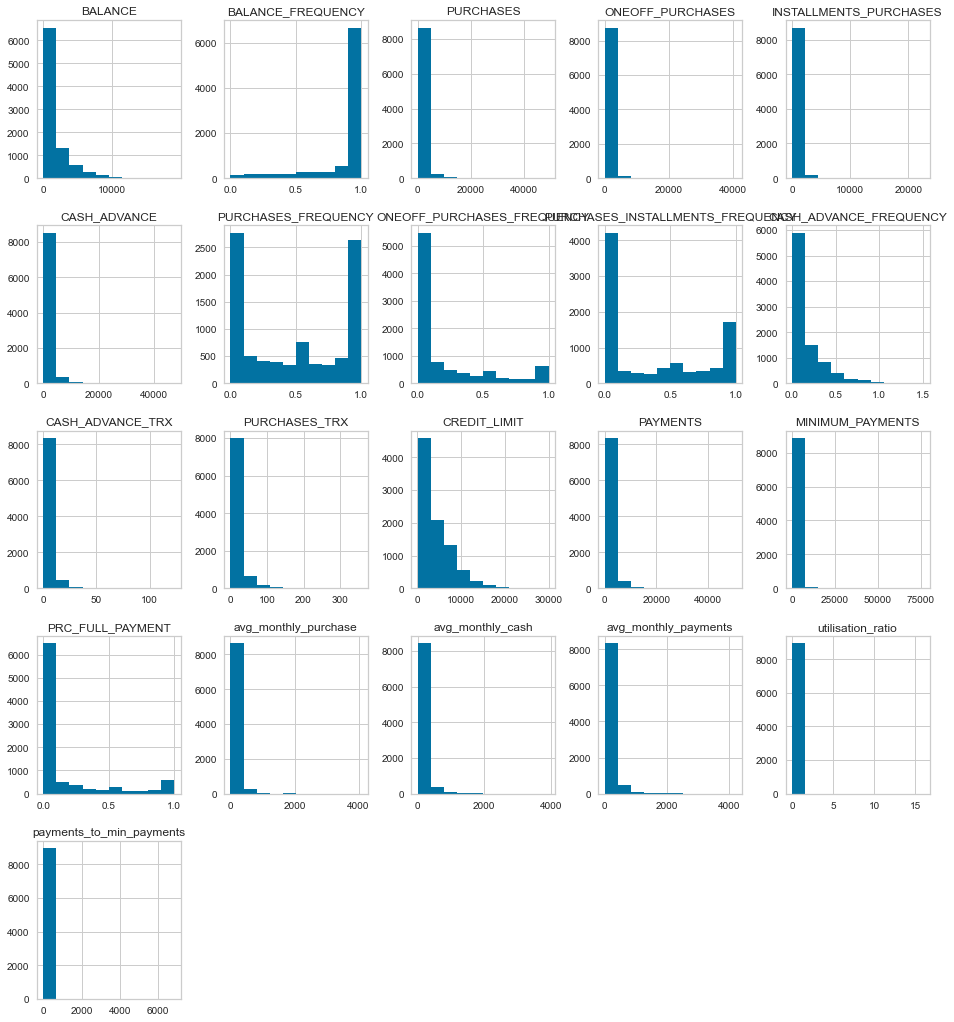

In [24]:
df[NUMERICAL_VARIABLES].hist(figsize = (16,18))
plt.show()

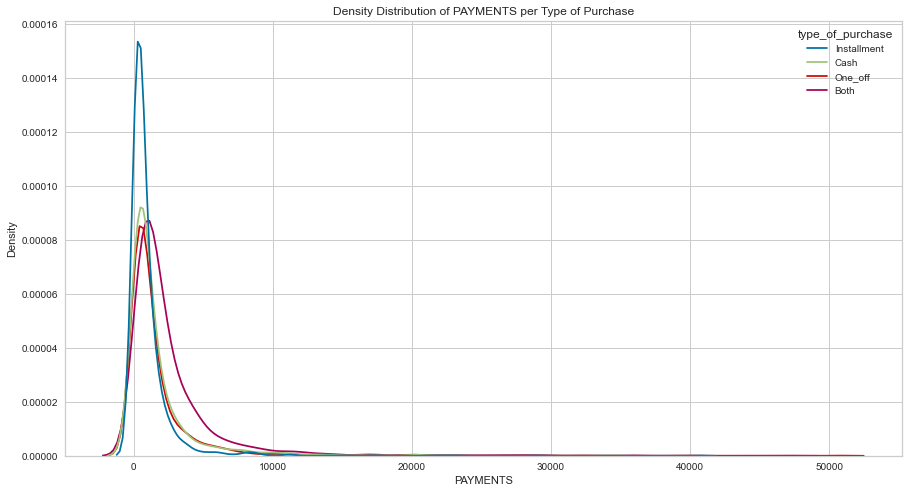

In [25]:
plt.figure(figsize = (15,8))
sns.kdeplot(data=df, x='PAYMENTS', hue="type_of_purchase").set(title=f"Density Distribution of PAYMENTS per Type of Purchase")
plt.show()

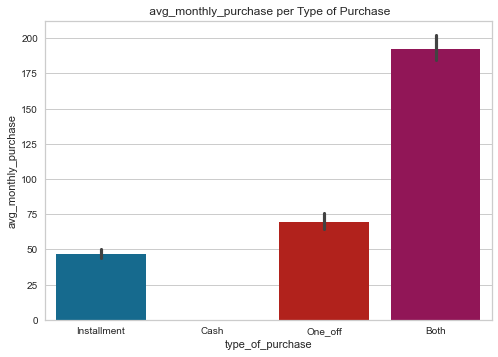

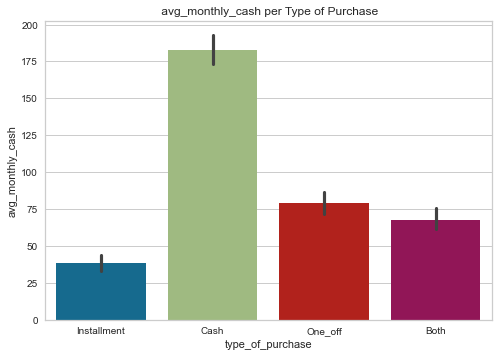

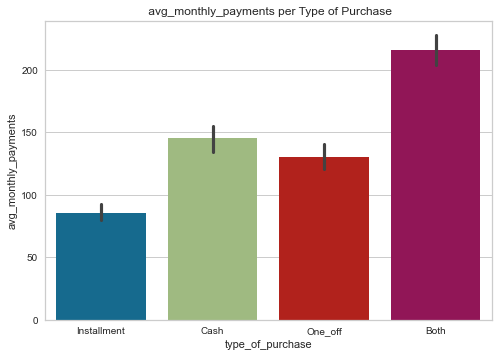

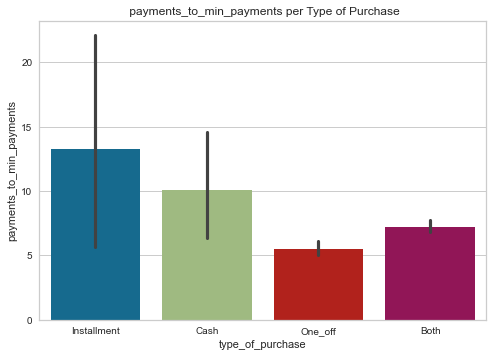

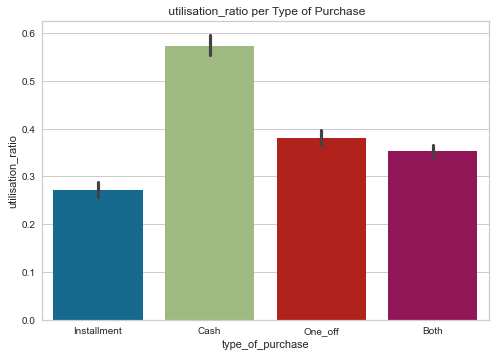

In [26]:
# Visualising spendings on type of purchase
SPENDING_VARIABLES = ['avg_monthly_purchase','avg_monthly_cash', 'avg_monthly_payments', 'payments_to_min_payments', 'utilisation_ratio']

for col in SPENDING_VARIABLES:
    sns.barplot(data = df, x = 'type_of_purchase', y = col).set(title=f" {col} per Type of Purchase")
    plt.show()

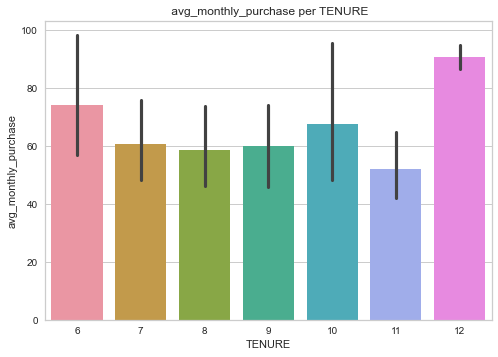

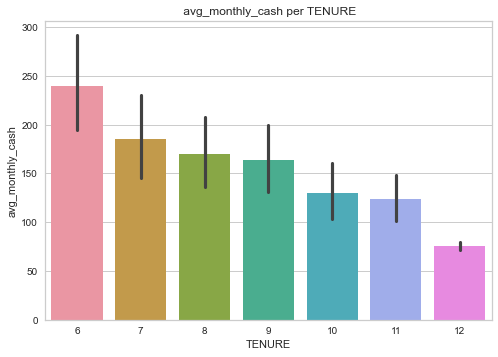

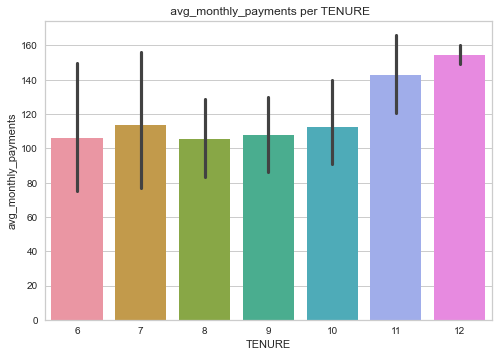

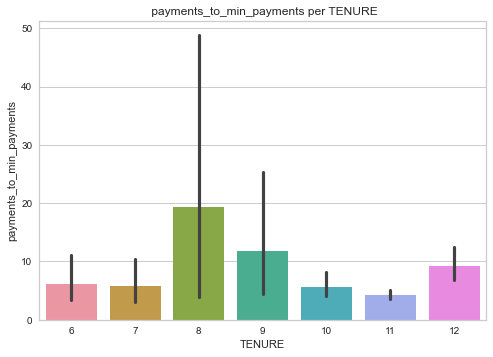

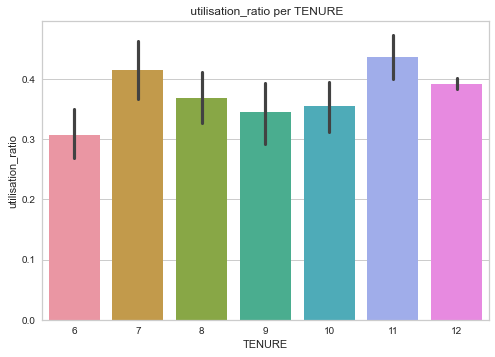

In [27]:
# Visualising spendings on tenure duration
for col in SPENDING_VARIABLES:
    sns.barplot(data = df, x = 'TENURE', y = col).set(title=f" {col} per TENURE")
    plt.show()

## 3.5 Feature Engineering

To deal with the cases for outliers, we will be using ranges to group these values together so we need not drop the outliers

In [28]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'type_of_purchase', 'avg_monthly_purchase',
       'avg_monthly_cash', 'avg_monthly_payments', 'utilisation_ratio',
       'payments_to_min_payments'],
      dtype='object')

In [29]:
df_range = df.copy()

In [30]:
numerical = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
            'avg_monthly_purchase', 'avg_monthly_cash', 'avg_monthly_payments', 'payments_to_min_payments']

for i in numerical:
    bucket = i +'_bin'
    df_range[bucket]=0        
    df_range.loc[((df_range[i]>0)&(df_range[i]<=500)), bucket]=1
    df_range.loc[((df_range[i]>500)&(df_range[i]<=1000)), bucket]=2
    df_range.loc[((df_range[i]>1000)&(df_range[i]<=3000)), bucket]=3
    df_range.loc[((df_range[i]>3000)&(df_range[i]<=5000)), bucket]=4
    df_range.loc[((df_range[i]>5000)&(df_range[i]<=10000)), bucket]=5
    df_range.loc[((df_range[i]>10000)), bucket]=6
    
df_range.drop(numerical, axis =1, inplace = True)

In [31]:
frequency = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for i in frequency:
    bucket = i +'_bin'
    df_range[bucket]=0        
    df_range.loc[((df_range[i]>0)&(df_range[i]<=0.1)), bucket]=1
    df_range.loc[((df_range[i]>0.1)&(df_range[i]<=0.2)), bucket]=2
    df_range.loc[((df_range[i]>0.2)&(df_range[i]<=0.3)), bucket]=3
    df_range.loc[((df_range[i]>0.3)&(df_range[i]<=0.4)), bucket]=4
    df_range.loc[((df_range[i]>0.4)&(df_range[i]<=0.5)), bucket]=5
    df_range.loc[((df_range[i]>0.5)&(df_range[i]<=0.6)), bucket]=6
    df_range.loc[((df_range[i]>0.6)&(df_range[i]<=0.7)), bucket]=7
    df_range.loc[((df_range[i]>0.7)&(df_range[i]<=0.8)), bucket]=8
    df_range.loc[((df_range[i]>0.8)&(df_range[i]<=0.9)), bucket]=9
    df_range.loc[((df_range[i]>0.9)&(df_range[i]<=1.0)), bucket]=10
    
df_range.drop(frequency, axis =1, inplace = True)

In [32]:
small = ['PURCHASES_TRX', 'CASH_ADVANCE_TRX','utilisation_ratio'] 

for i in small:
    bucket = i +'_bin'
    df_range[bucket]=0        
    df_range.loc[((df_range[i]>0)&(df_range[i]<=5)), bucket]=1
    df_range.loc[((df_range[i]>5)&(df_range[i]<=10)), bucket]=2
    df_range.loc[((df_range[i]>10)&(df_range[i]<=15)), bucket]=3
    df_range.loc[((df_range[i]>15)&(df_range[i]<=20)), bucket]=4
    df_range.loc[((df_range[i]>20)&(df_range[i]<=30)), bucket]=5
    df_range.loc[((df_range[i]>30)&(df_range[i]<=50)), bucket]=6
    df_range.loc[((df_range[i]>50)&(df_range[i]<=100)), bucket]=7
    df_range.loc[((df_range[i]>100)), bucket]=8
    
df_range.drop(small, axis =1, inplace = True)

In [33]:
df_range.head()

,TENURE,type_of_purchase,BALANCE_bin,PURCHASES_bin,ONEOFF_PURCHASES_bin,INSTALLMENTS_PURCHASES_bin,CASH_ADVANCE_bin,CREDIT_LIMIT_bin,PAYMENTS_bin,MINIMUM_PAYMENTS_bin,...,payments_to_min_payments_bin,BALANCE_FREQUENCY_bin,PURCHASES_FREQUENCY_bin,ONEOFF_PURCHASES_FREQUENCY_bin,PURCHASES_INSTALLMENTS_FREQUENCY_bin,CASH_ADVANCE_FREQUENCY_bin,PRC_FULL_PAYMENT_bin,PURCHASES_TRX_bin,CASH_ADVANCE_TRX_bin,utilisation_ratio_bin
0,12,Installment,1,1,0,1,0,2,1,1,...,1,9,2,0,1,0,0,1,0,1
1,12,Cash,4,0,0,0,5,5,4,3,...,1,10,0,0,0,3,3,0,1,1
2,12,One_off,3,2,2,0,0,5,2,2,...,1,10,10,10,0,0,0,3,0,1
3,12,One_off,3,3,3,0,1,5,0,3,...,0,7,1,1,0,1,0,1,1,1
4,12,One_off,2,1,1,0,0,3,2,1,...,1,10,1,1,0,0,0,1,0,1


## 4. Feature Scaling

In [34]:
df_range = df_range.drop(columns = ['type_of_purchase','BALANCE_bin', 'BALANCE_FREQUENCY_bin', 'utilisation_ratio_bin'])

In [35]:
scaler = StandardScaler()
X = df_range.copy()
df_scaled = scaler.fit_transform(X)

## 5. PCA
To reduce the number of dimensions/factors

ValueError: x and y must have same first dimension, but have shapes (22,) and (19,)

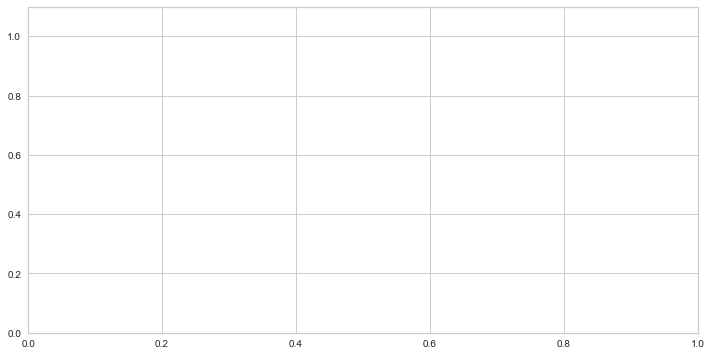

In [36]:
pca = PCA().fit(df_scaled)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, 22, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 22, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
#We want to be able to see how many components explain 95% of the variance
pca = PCA(n_components= 0.90)
pca.fit(df_scaled)
reduced = pca.transform(df_scaled)

In [ ]:
var = pca.explained_variance_ratio_
var

In [ ]:
pca.explained_variance_

In [ ]:
#Cumulative Variance explains
cum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

pca_df = pd.DataFrame({'eigen_value': pca.explained_variance_, 'cumulative_variance':cum_var}, index=range(1,12)).round(4)

#Based on the results, we observe that 13 components explain 95% of the variance.
pca_df

In [ ]:
sns.lineplot(pca_df['cumulative_variance'])
plt.show()

### PCA Components Selection:

To explain roughly 90% of our variance, we decided to extract the first 11 variables to proceed.

#### PCA with 11 Components

In [ ]:
pca_11 = PCA(n_components = 11)
x_pca_11 = pca_11.fit_transform(df_scaled)

pca_11_df = pd.DataFrame(x_pca_11, columns = ['PC1', 'PC2' ,'PC3' ,'PC4' ,'PC5' ,'PC6', 'PC7','PC8', 'PC9', 'PC10', 'PC11'])
pca_11_df

In [ ]:
cols = df_scaled.columns
pca11_variables_df = pd.DataFrame(pca_11.components_.T, columns = ['PC_'+str(i) for i in range(1,len(pca_11_df.columns) + 1)], index = cols)
pca11_variables_df

In [ ]:
pd.Series(pca_11.explained_variance_ratio_*100, index = ['PC_' + str(i) for i in range(1,12)])

In [ ]:
fig, ax = plt.subplots(figsize=(24, 16))
plt.imshow(pca.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(df_scaled.columns)), df_scaled.columns)
plt.xticks(range(len(pca_11_df.columns)), pca_11_df.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()
plt.show()

#### Extract the first 7 variables that explain 85.95% variation cumulatively:

In [ ]:
pca_7 = PCA(n_components=7)
x_pca_7 = pca_7.fit_transform(df_scaled)

pca_7_df = pd.DataFrame(x_pca_7, columns=['PC1 PC2 PC3 PC4 PC5 PC6 PC7'.split()])
pca_7_df

In [ ]:
list_columns = df_scaled.columns
pca7_variables_df = pd.DataFrame(pca_7.components_.T, columns = ['PC_'+str(i) for i in range(1,8)], index = list_columns)
pca7_variables_df

## 6. Clustering

1. K-means clustering (Elbow method) or Hierarchical Clustering, then dendogram
2. Get segment distribution (avg of each variable for each segment)
3. Profiling using personas 
4. Classify new customers into segments & 
5. Suggest relevant marketing strategies for each segment 

### K-Means Clustering (Elbow Method)

In [52]:
n_clusters=30
cost=[]
for i in range(1 ,n_clusters):
    kmean= KMeans(i, random_state = 0, max_iter = 500)
    kmean.fit(df_scaled)
    cost.append(kmean.inertia_) 

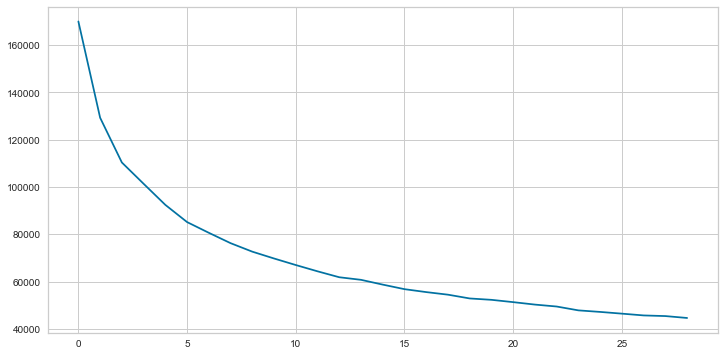

In [53]:
plt.plot(cost, 'bx-')
plt.show()

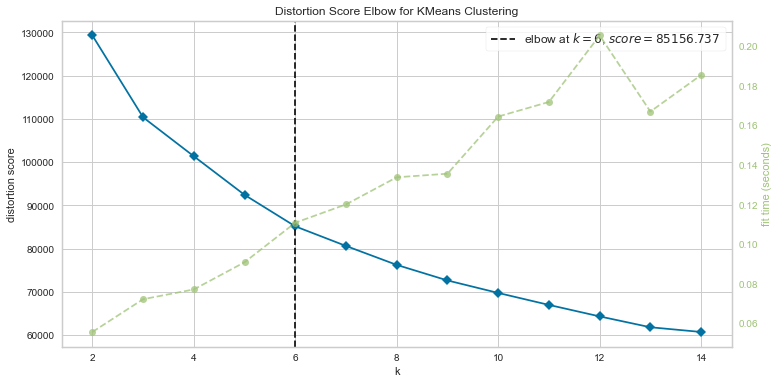

In [39]:
model = KMeans(random_state=0, max_iter = 500)
distortion_visualizer = KElbowVisualizer(model, k=(2,15))

distortion_visualizer.fit(df_scaled)       
distortion_visualizer.show()       
plt.show()

In [54]:
km_model = KMeans(6, random_state = 0, max_iter = 500)
km_model.fit(df_scaled)
labels = km_model.labels_
centroids = km_model.cluster_centers_

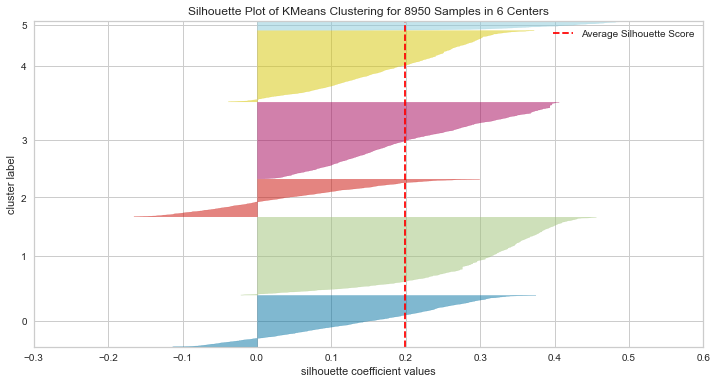

In [55]:
sil_viz= SilhouetteVisualizer(km_model, colors='yellowbrick')
sil_viz.fit(df_scaled)
sil_viz.show()
plt.show()

In [56]:
print(f'Davies-Bouldin index = {davies_bouldin_score(df_scaled, labels)}')
print(f'Silhouette Score = {silhouette_score(df_scaled, labels)}')

Davies-Bouldin index = 1.4947938877952025
Silhouette Score = 0.19859924007679908


In [57]:
cluster_df = pd.concat([df_range, pd.DataFrame({'cluster':labels})], axis = 1)
cluster_df.head()

,TENURE,PURCHASES_bin,ONEOFF_PURCHASES_bin,INSTALLMENTS_PURCHASES_bin,CASH_ADVANCE_bin,CREDIT_LIMIT_bin,PAYMENTS_bin,MINIMUM_PAYMENTS_bin,avg_monthly_purchase_bin,avg_monthly_cash_bin,avg_monthly_payments_bin,payments_to_min_payments_bin,PURCHASES_FREQUENCY_bin,ONEOFF_PURCHASES_FREQUENCY_bin,PURCHASES_INSTALLMENTS_FREQUENCY_bin,CASH_ADVANCE_FREQUENCY_bin,PRC_FULL_PAYMENT_bin,PURCHASES_TRX_bin,CASH_ADVANCE_TRX_bin,cluster
0,12,1,0,1,0,2,1,1,1,0,1,1,2,0,1,0,0,1,0,3
1,12,0,0,0,5,5,4,3,0,2,1,1,0,0,0,3,3,0,1,1
2,12,2,2,0,0,5,2,2,1,0,1,1,10,10,0,0,0,3,0,3
3,12,3,3,0,1,5,0,3,1,1,0,0,1,1,0,1,0,1,1,5
4,12,1,1,0,0,3,2,1,1,0,1,1,1,1,0,0,0,1,0,3


In [58]:
cluster_df.cluster.value_counts()

1    2154
3    2117
4    1973
0    1425
2    1041
5     240
Name: cluster, dtype: int64

In [59]:
Z = linkage(cluster_df, method='average', metric = 'euclidean')

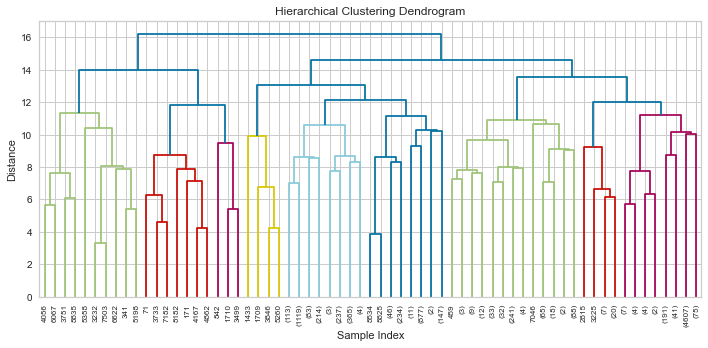

In [60]:
# Plot the dendrogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, truncate_mode='level', p = 6)
plt.tight_layout()
plt.show()

## 7. Cluster Analysis

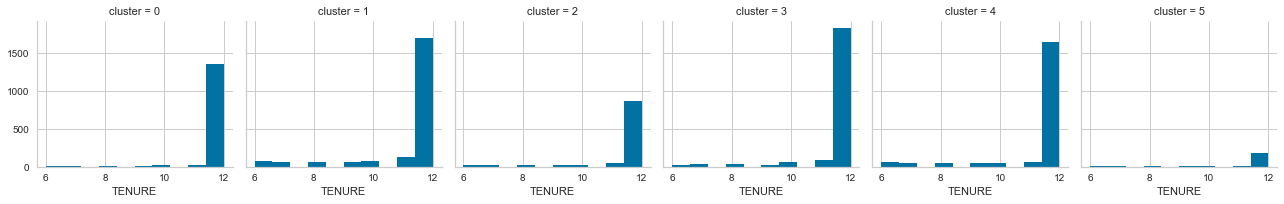

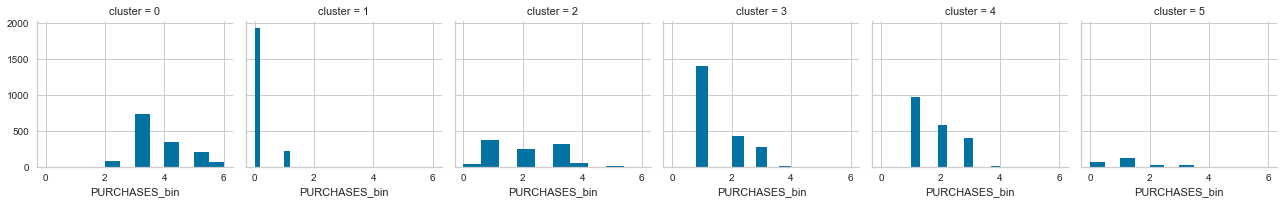

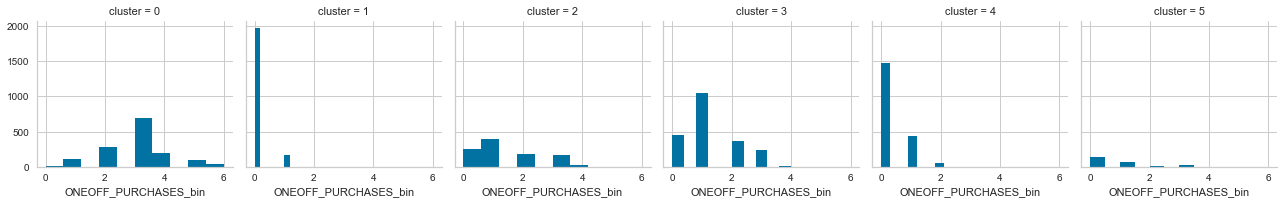

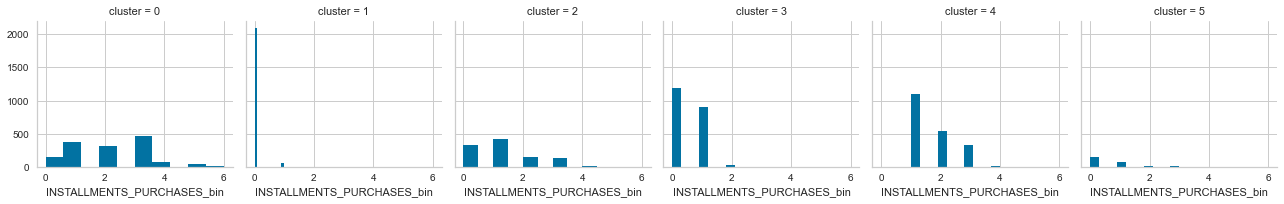

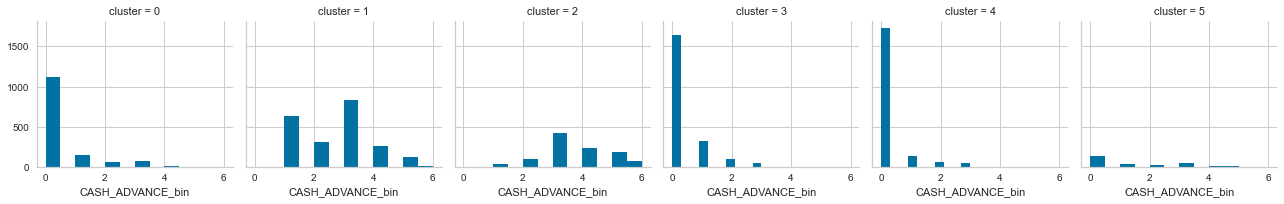

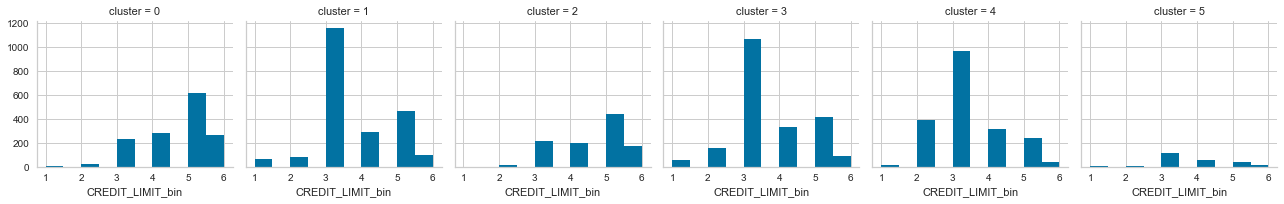

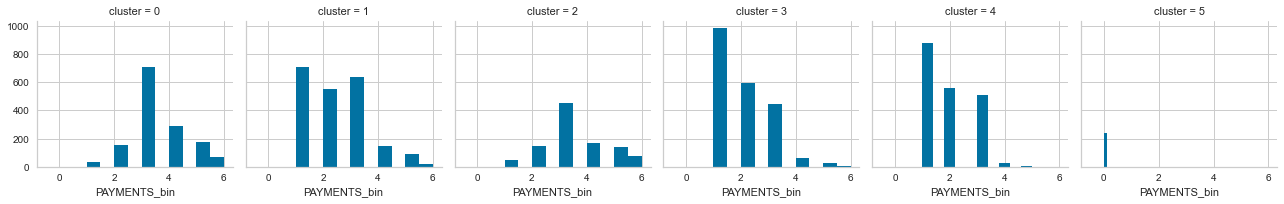

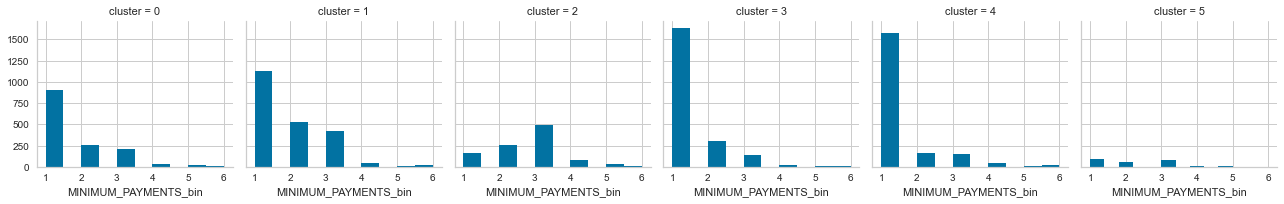

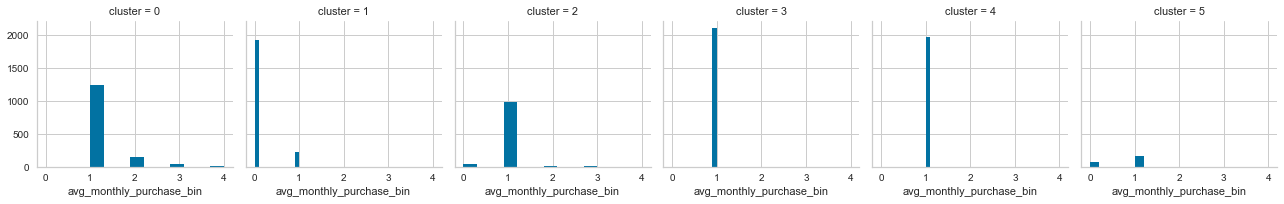

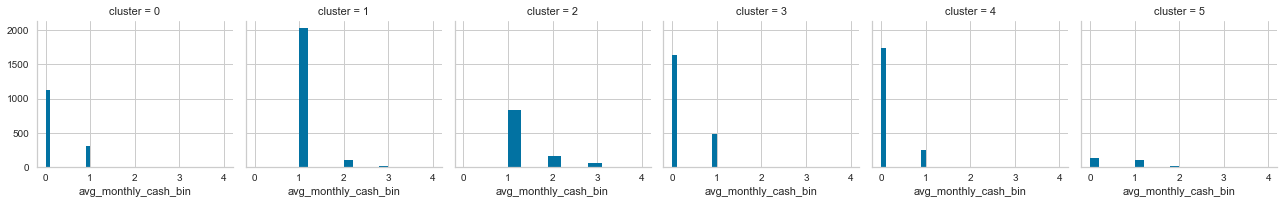

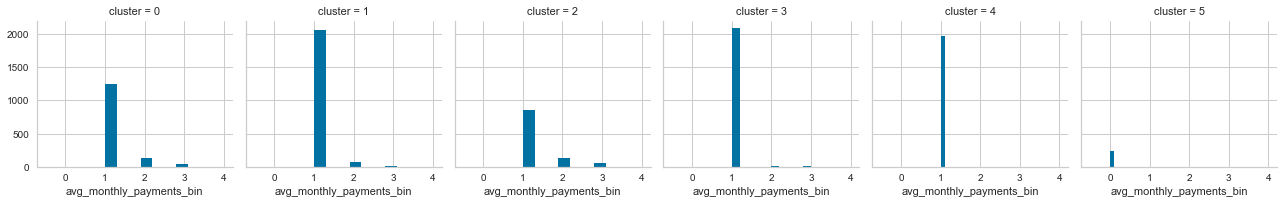

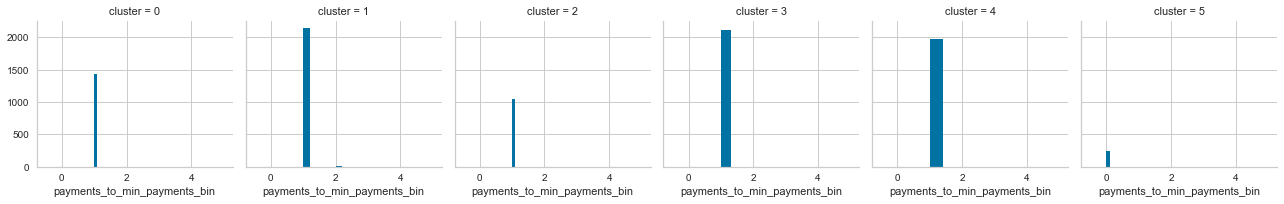

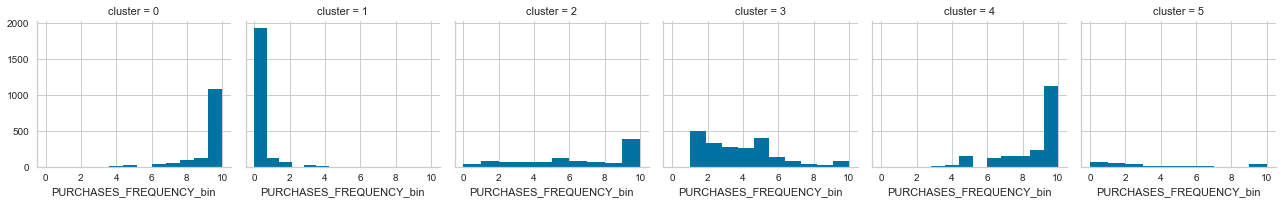

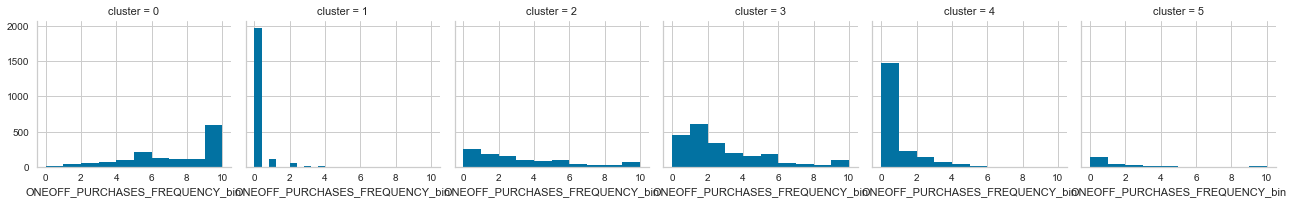

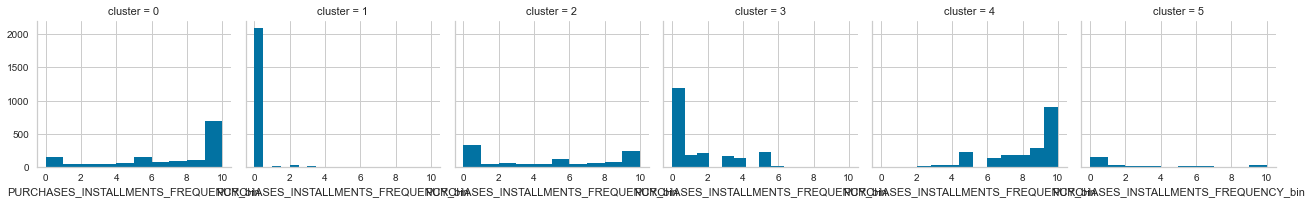

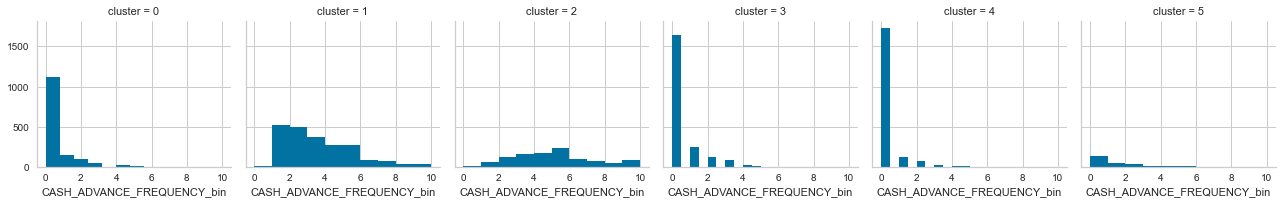

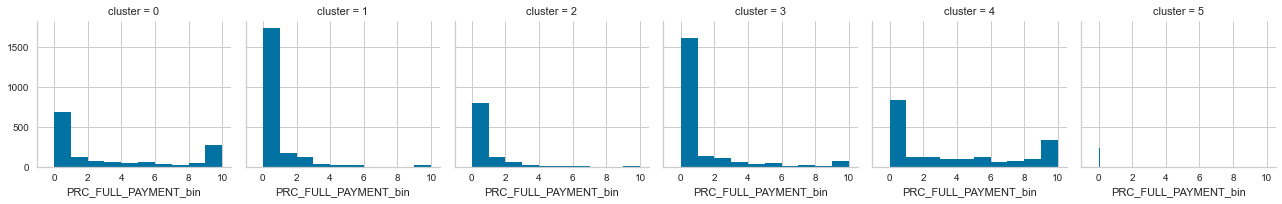

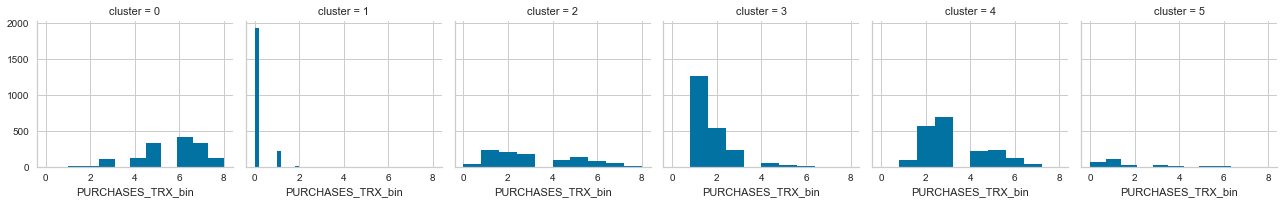

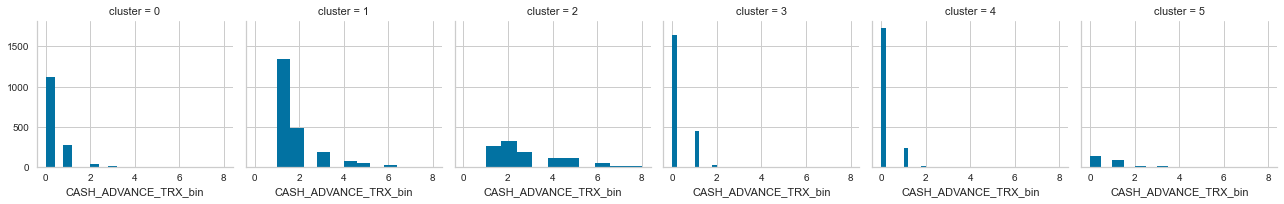

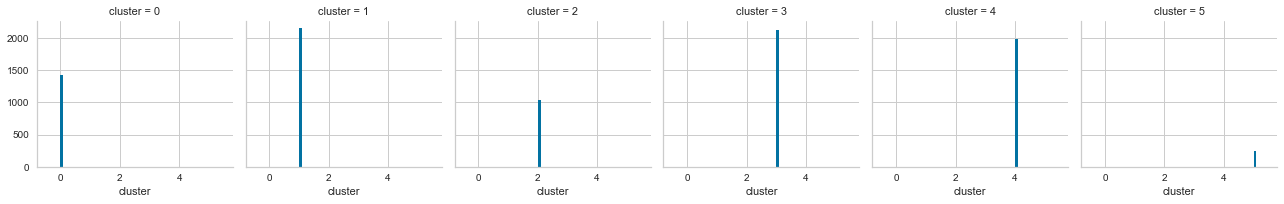

In [61]:
for c in cluster_df:
    grid= sns.FacetGrid(cluster_df, col='cluster')
    grid.map(plt.hist, c)

In [62]:
#Clusters distribution/mean values for features
analysis_df = df.copy()
analysis_df['cluster'] = labels
analysis_df.groupby('cluster').mean().T

cluster,0,1,2,3,4,5
BALANCE,1811.612104,2078.182361,3958.913027,808.613080,475.179128,722.945345
BALANCE_FREQUENCY,0.971206,0.900280,0.970293,0.791542,0.877158,0.466664
PURCHASES,3744.098905,16.299378,1084.853564,485.302763,685.370644,413.661125
ONEOFF_PURCHASES,2494.876358,13.699879,633.231662,408.356580,63.817983,283.367500
INSTALLMENTS_PURCHASES,1249.643600,2.639865,451.655255,77.203330,622.272671,130.293625
CASH_ADVANCE,193.532029,1783.991394,3935.858915,107.461944,73.523000,719.203785
PURCHASES_FREQUENCY,0.920129,0.014753,0.591062,0.324997,0.848499,0.284475
ONEOFF_PURCHASES_FREQUENCY,0.674887,0.009927,0.256231,0.210133,0.043962,0.127395
PURCHASES_INSTALLMENTS_FREQUENCY,0.665898,0.004118,0.413659,0.117183,0.801715,0.181085
CASH_ADVANCE_FREQUENCY,0.035201,0.272283,0.430010,0.033003,0.017889,0.083658


In [63]:
# #To better visualise the clusters in 2D, the PCA components will be set to 2
distance = 1 - cosine_similarity(df_scaled)

pca = PCA(n_components = 2)
pca.fit(distance)
x_pca = pca.transform(distance)

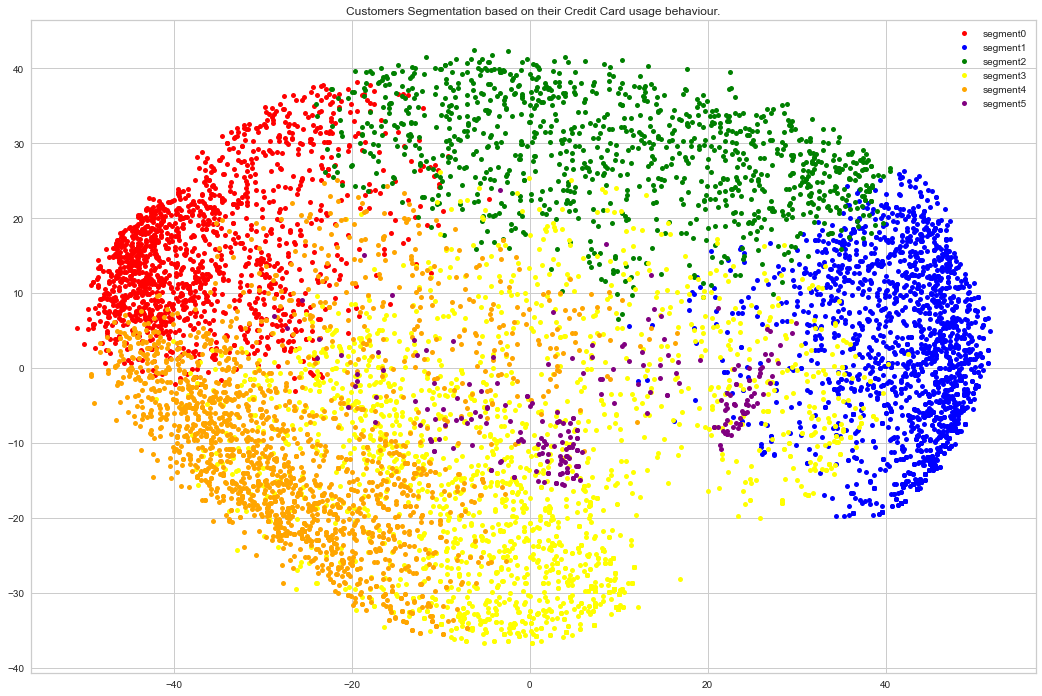

In [64]:
x, y = x_pca[:, 0], x_pca[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5: 'purple',
          #6: 'black',
          #7: 'magenta'
         
         }

names = {0: 'segment0', 
         1: 'segment1', 
         2: 'segment2', 
         3: 'segment3', 
         4: 'segment4',
         5: 'segment5',
         #6: 'segment5',
         #7: 'segment6'
        }
  
df_plot = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df_plot.groupby('label')

fig, ax = plt.subplots(figsize=(18, 12)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')

ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage behaviour.")
plt.show()

In [69]:
numerical_features = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", 
                      'ONEOFF_PURCHASES', 'PAYMENTS','cluster']

frequency_features = ['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
                      'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 
                      'cluster']

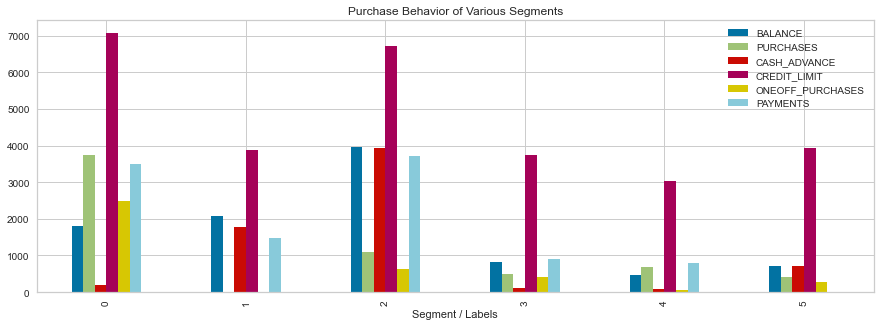

In [70]:
analysis_df[numerical_features].groupby(['cluster']).mean().plot.bar(figsize = (15,5))
plt.title('Purchase Behavior of Various Segments')
plt.xlabel('Segment / Labels');
plt.show()

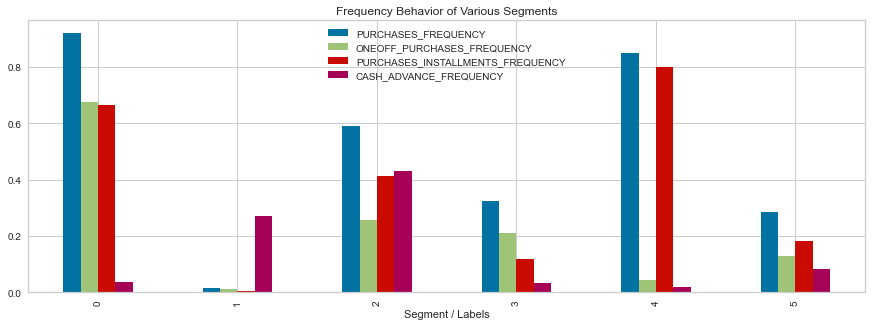

In [71]:
analysis_df[frequency_features].groupby("cluster").mean().plot.bar(figsize=(15, 5))
plt.title('Frequency Behavior of Various Segments')
plt.xlabel('Segment / Labels');
plt.show()

In [72]:
analysis_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'type_of_purchase', 'avg_monthly_purchase',
       'avg_monthly_cash', 'avg_monthly_payments', 'utilisation_ratio',
       'payments_to_min_payments', 'cluster'],
      dtype='object')

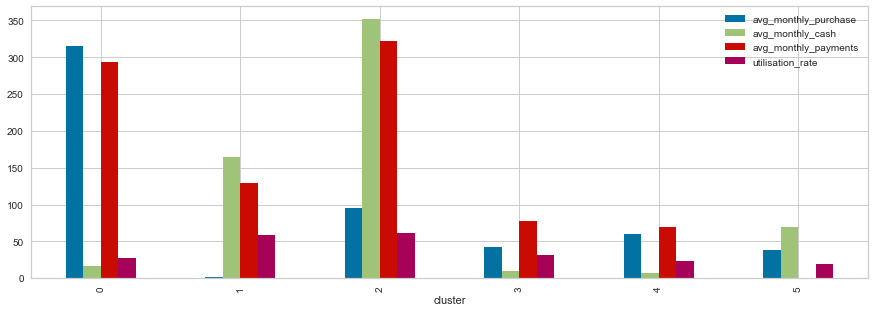

In [85]:
analysis_df['utilisation_rate'] = analysis_df['utilisation_ratio'] * 100
analysis_df[['avg_monthly_purchase','avg_monthly_cash', 
             'avg_monthly_payments', 'utilisation_rate', 'cluster']].groupby('cluster').mean().plot.bar(figsize = (15,5))
plt.show()

In [86]:
df_analysis = analysis_df.drop(columns = ['type_of_purchase'])

In [87]:
chi_square_value, p_value=calculate_bartlett_sphericity(df_analysis)
chi_square_value, p_value

(nan, nan)

In [88]:
kmo_all,kmo_model=calculate_kmo(df_analysis)
print(kmo_model)
len(kmo_all)

0.7002285972594845


24

In [89]:
fa = FactorAnalyzer()
fa.fit(df_analysis)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([6.01907435e+00, 4.93919328e+00, 2.36726716e+00, 1.65874227e+00,
       1.25739751e+00, 1.15300120e+00, 9.94262987e-01, 9.29193221e-01,
       7.60630749e-01, 7.19903636e-01, 6.72362027e-01, 5.89150757e-01,
       5.11436010e-01, 3.91901787e-01, 3.34574071e-01, 2.70223047e-01,
       1.96433140e-01, 1.69632721e-01, 3.83033835e-02, 1.85519374e-02,
       5.44655442e-03, 3.30655717e-03, 1.16354282e-05, 4.15046144e-18])

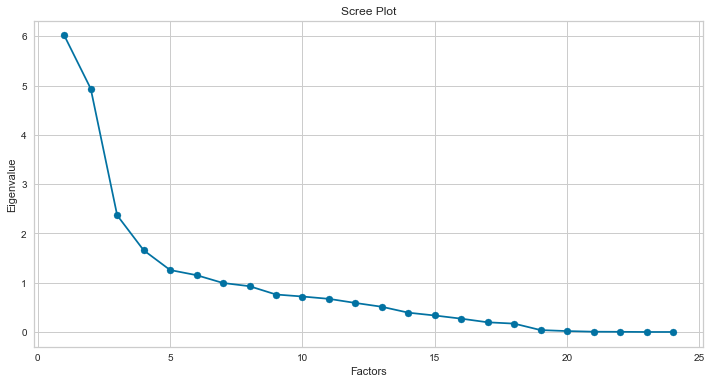

In [90]:
# Create scree plot using matplotlib
plt.scatter(range(1,df_analysis.shape[1]+1),ev)
plt.plot(range(1,df_analysis.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

In [91]:
fa = FactorAnalyzer(n_factors=3,rotation='varimax')
fa.fit(df_analysis)
loads = fa.loadings_
print(pd.DataFrame(fa.loadings_,index=df_analysis.columns))

                                         0         1         2
BALANCE                           0.171187  0.515579  0.514354
BALANCE_FREQUENCY                 0.206751  0.049635  0.447100
PURCHASES                         0.944565  0.115327 -0.008572
ONEOFF_PURCHASES                  0.778882  0.153297 -0.016611
INSTALLMENTS_PURCHASES            0.676944 -0.008210  0.000303
CASH_ADVANCE                     -0.122043  0.898246  0.091688
PURCHASES_FREQUENCY               0.581488 -0.285960 -0.101609
ONEOFF_PURCHASES_FREQUENCY        0.572100 -0.011298 -0.008780
PURCHASES_INSTALLMENTS_FREQUENCY  0.476926 -0.260894 -0.079305
CASH_ADVANCE_FREQUENCY           -0.217171  0.669665  0.303751
CASH_ADVANCE_TRX                 -0.145084  0.671005  0.195938
PURCHASES_TRX                     0.793149 -0.034083  0.050613
CREDIT_LIMIT                      0.376617  0.399756 -0.054184
PAYMENTS                          0.574546  0.615363 -0.068501
MINIMUM_PAYMENTS                  0.100669  0.127285  0

In [102]:
factor_1 = pd.DataFrame(fa.loadings_,index=df_analysis.columns)
factor_1 = factor_1[factor_1[0] > 0.5]
#factor_1.index # 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
    #'PURCHASES_TRX', 'PAYMENTS', 'avg_monthly_purchase', 'avg_monthly_payments']

factor_2 = pd.DataFrame(fa.loadings_,index=df_analysis.columns)
factor_2 = factor_2[factor_2[1] > 0.5]
#factor_2.index #'BALANCE', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PAYMENTS', 'avg_monthly_cash', 'avg_monthly_payments'

factor_3 = pd.DataFrame(fa.loadings_,index=df_analysis.columns)
factor_3 = factor_3[factor_3[2] > 0.5]
#factor_3.index #'BALANCE', 'utilisation_ratio', 'utilisation_rate'

Index(['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_TRX',
       'PAYMENTS', 'avg_monthly_purchase', 'avg_monthly_payments'],
      dtype='object')

In [96]:
#Create the factors
factor1 = df_analysis[factor_1.index]
factor2 = df_analysis[factor_2.index]
factor3 = df_analysis[factor_3.index]
#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
print(factor1_alpha, factor2_alpha, factor3_alpha)

(0.7252671972423025, array([0.717, 0.734])) (0.5912938994078689, array([0.578, 0.604])) (0.02803345976949534, array([-0.007,  0.062]))


In [97]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2
Variance          5.488865  4.037765  2.801513
Proportional Var  0.228703  0.168240  0.116730
Cumulative Var    0.228703  0.396943  0.513673


In [98]:
# Communality is the proportion of each variable’s variance 
# that can be explained by the factors. Rotations don’t have any influence over the communality of the variables.
print(pd.DataFrame(fa.get_communalities(),index=df_analysis.columns,columns=['Communalities']))

                                  Communalities
BALANCE                                0.559686
BALANCE_FREQUENCY                      0.245109
PURCHASES                              0.905577
ONEOFF_PURCHASES                       0.630433
INSTALLMENTS_PURCHASES                 0.458321
CASH_ADVANCE                           0.830146
PURCHASES_FREQUENCY                    0.430226
ONEOFF_PURCHASES_FREQUENCY             0.327503
PURCHASES_INSTALLMENTS_FREQUENCY       0.301813
CASH_ADVANCE_FREQUENCY                 0.587879
CASH_ADVANCE_TRX                       0.509689
PURCHASES_TRX                          0.632809
CREDIT_LIMIT                           0.304581
PAYMENTS                               0.713467
MINIMUM_PAYMENTS                       0.127981
PRC_FULL_PAYMENT                       0.245431
TENURE                                 0.029140
avg_monthly_purchase                   0.892414
avg_monthly_cash                       0.795962
avg_monthly_payments                   0

In [ ]:
# Both = 0.0 , Cash = 1.0, Installment = 2.0, One_off = 3.0

## 8. Multinomial Logistic Regression

In [227]:
X = df_analysis.copy()
y = X['cluster']
X = X.drop(columns = ['utilisation_rate', 'cluster'])

In [228]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [229]:
lr_model = make_pipeline(StandardScaler(), LogisticRegression(multi_class='auto', random_state = 0))
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(x_test)

In [230]:
print(classification_report(y_test, lr_y_pred))
print(accuracy_score(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       399
           1       0.93      0.97      0.95       661
           2       0.90      0.91      0.91       305
           3       0.92      0.92      0.92       647
           4       0.96      0.95      0.96       610
           5       0.51      0.43      0.47        63

    accuracy                           0.93      2685
   macro avg       0.86      0.85      0.86      2685
weighted avg       0.93      0.93      0.93      2685

0.9277467411545623


In [236]:
lr_coef = pd.DataFrame(lr_model.named_steps['logisticregression'].coef_, columns = X.columns).T
lr_bias = pd.DataFrame(lr_model.named_steps['logisticregression'].intercept_, columns = ['Bias']).T
lr_weights = pd.concat([lr_bias, lr_coef], axis = 0)
lr_weights.round(3)

,0,1,2,3,4,5
Bias,1.057,-5.457,4.122,3.787,1.480,-4.989
BALANCE,0.014,-0.442,0.326,-0.739,-0.591,1.432
BALANCE_FREQUENCY,0.058,0.459,-0.058,0.070,0.282,-0.811
PURCHASES,1.510,-2.062,0.650,-0.362,-0.645,0.910
ONEOFF_PURCHASES,1.655,-2.018,0.691,0.752,-1.638,0.558
INSTALLMENTS_PURCHASES,0.542,-1.177,0.142,-2.121,1.566,1.049
CASH_ADVANCE,-0.383,0.902,1.341,-1.617,-1.034,0.791
PURCHASES_FREQUENCY,1.546,-5.044,1.088,0.902,1.876,-0.368
ONEOFF_PURCHASES_FREQUENCY,2.639,-4.147,0.555,0.116,-0.517,1.354
PURCHASES_INSTALLMENTS_FREQUENCY,1.825,-2.369,-0.038,-1.850,1.978,0.454


In [232]:
X_train1 = np.array(X_train)
y_train1 = np.array(y_train)

lda_model = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())
lda_model.fit(X_train1, y_train1)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())])

In [233]:
lda_coef = pd.DataFrame(lda_model.named_steps['lineardiscriminantanalysis'].coef_, columns = X.columns).T
lda_bias = pd.DataFrame(lda_model.named_steps['lineardiscriminantanalysis'].intercept_, columns = ['Bias']).T
lda_weights = pd.concat([lda_coef, lda_bias], axis = 0)
lda_weights.round(3)

,0,1,2,3,4,5
BALANCE,0.096,-0.244,0.945,-0.325,0.120,-0.645
BALANCE_FREQUENCY,-0.038,0.681,-0.325,-0.152,-0.096,-2.169
PURCHASES,6.184,17.918,10.285,0.705,-32.974,18.310
ONEOFF_PURCHASES,-2.386,-13.563,-9.855,-1.156,24.909,-13.002
INSTALLMENTS_PURCHASES,-1.141,-7.510,-5.589,-0.523,13.619,-7.333
CASH_ADVANCE,-0.982,-0.109,1.588,-0.654,0.493,1.639
PURCHASES_FREQUENCY,-0.645,-5.258,2.462,-0.781,5.858,-0.772
ONEOFF_PURCHASES_FREQUENCY,4.196,0.171,-0.484,0.234,-3.359,0.177
PURCHASES_INSTALLMENTS_FREQUENCY,3.112,-0.046,-0.802,-1.534,-0.116,-0.686
CASH_ADVANCE_FREQUENCY,-1.347,1.832,2.526,-1.046,-1.160,-0.522


In [234]:
X_test1 = np.array(x_test)
y_test1 = np.array(y_test)

lda_y_pred = lda_model.predict(X_test1)

In [235]:
print(classification_report(y_test1, lda_y_pred))
print(accuracy_score(y_test1, lda_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       399
           1       0.85      0.90      0.87       661
           2       0.89      0.65      0.75       305
           3       0.82      0.81      0.82       647
           4       0.85      0.93      0.89       610
           5       0.32      0.48      0.38        63

    accuracy                           0.83      2685
   macro avg       0.77      0.76      0.76      2685
weighted avg       0.84      0.83      0.83      2685

0.8309124767225325
